# Assignment 4

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
file_path = '/content/drive/MyDrive/Universitet/Kandidat - Business Data Science/1. Semester/GEM 2020 APS Global Individual Level Data_Jan2022.parquet'
data = pd.read_parquet(file_path, engine='pyarrow')

#EDA

In [123]:
# Select only numerical columns
df_numeric = data.select_dtypes(include=np.number)
df_numeric = df_numeric.drop(['age9c', 'age7c'], axis=1)

# Calculate the correlation matrix
df_corr = df_numeric.corr()

# Get the absolute correlation values with 'fearfaill'
Age_corr = df_corr['age'].abs()

# Sort the correlations in descending order and get the top 20
top_30_corr = Age_corr.sort_values(ascending=False).head(31)

# Remove 'fearfaill' itself from the result
top_30_corr = top_30_corr[1:]

# Print the result
print(top_30_corr)

occurt            0.546382
occustu           0.480379
omwageyr          0.406318
barel_o           0.244402
region            0.235756
occuseek          0.217236
futsup            0.214766
futsupyy          0.214766
bc_occuseek       0.211542
futsupno          0.205387
wbincrev          0.199097
ommotiv2          0.195311
eb_yymot2         0.191336
wbinc             0.189045
omyr5jc           0.184915
occuump           0.175638
bb_yymot2         0.169619
teayymot2         0.167803
eb_yymot2yes      0.166360
su_yymot2         0.164588
eb_yyj5y          0.163245
visio_1           0.156983
omown             0.153595
visionyy          0.151335
vision            0.151335
ombustype_code    0.151188
suwageyr          0.140047
teayymot2yes      0.139571
omcrnewopp        0.139494
su_yymot2yes      0.139408
Name: age, dtype: float64


In [124]:
df = data[['gemhhinc', 'gemeduc', 'nbmedial', 'age', 'bstart', 'region']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141403 entries, 0 to 141402
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   gemhhinc  112810 non-null  float64
 1   gemeduc   137870 non-null  float64
 2   nbmedial  109673 non-null  float64
 3   age       136324 non-null  float64
 4   bstart    139456 non-null  float64
 5   region    141403 non-null  float64
dtypes: float64(6)
memory usage: 6.5 MB


In [125]:
df_filtered = df.dropna()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81550 entries, 0 to 141402
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gemhhinc  81550 non-null  float64
 1   gemeduc   81550 non-null  float64
 2   nbmedial  81550 non-null  float64
 3   age       81550 non-null  float64
 4   bstart    81550 non-null  float64
 5   region    81550 non-null  float64
dtypes: float64(6)
memory usage: 4.4 MB


In [126]:
df_filtered.head()

,gemhhinc,gemeduc,nbmedial,age,bstart,region
0,3467.0,1720.0,4.0,44.0,0.0,4.0
1,68100.0,1316.0,1.0,40.0,0.0,4.0
2,3467.0,1316.0,4.0,64.0,1.0,4.0
3,68100.0,1316.0,1.0,42.0,0.0,4.0
4,3467.0,1316.0,3.0,37.0,1.0,4.0


In [127]:
# Now i want to show the categories for household income level and highest level of education represented in numerical values, and how many times they are used
# Also... a simple check for "equal" distribution
for col in ['gemhhinc', 'gemeduc', 'nbmedial', 'bstart', 'region']:
  print(f'Value counts for {col}:')
  print(df_filtered[col].value_counts())
  print('\n')

Value counts for gemhhinc:
gemhhinc
33.0       28652
68100.0    28209
3467.0     24689
Name: count, dtype: int64


Value counts for gemeduc:
gemeduc
1316.0    31772
1212.0    24392
111.0     12861
1720.0     6639
0.0        5886
Name: count, dtype: int64


Value counts for nbmedial:
nbmedial
4.0    26976
5.0    19547
2.0    15741
3.0    10278
1.0     9008
Name: count, dtype: int64


Value counts for bstart:
bstart
0.0    69292
1.0    12258
Name: count, dtype: int64


Value counts for region:
region
4.0    45202
1.0    18847
2.0     9413
3.0     8088
Name: count, dtype: int64




In [128]:
# Create a dictionaries mapping old values to new values
value_mapping1 = {33.0: 1, 3467 : 2, 68100.0 : 3}
df_filtered['gemhhinc'] = df_filtered['gemhhinc'].replace(value_mapping1)

value_mapping2 = {0.0:1,111.0:2, 1212.0:3, 1316.0:4, 1720.0:5}
df_filtered['gemeduc'] = df_filtered['gemeduc'].replace(value_mapping2)

# Verify the changes
for col in ['gemhhinc', 'gemeduc', 'nbmedial', 'bstart', 'region']:
  print(f'Value counts for {col}:')
  print(df_filtered[col].value_counts())
  print('\n')

Value counts for gemhhinc:
gemhhinc
1.0    28652
3.0    28209
2.0    24689
Name: count, dtype: int64


Value counts for gemeduc:
gemeduc
4.0    31772
3.0    24392
2.0    12861
5.0     6639
1.0     5886
Name: count, dtype: int64


Value counts for nbmedial:
nbmedial
4.0    26976
5.0    19547
2.0    15741
3.0    10278
1.0     9008
Name: count, dtype: int64


Value counts for bstart:
bstart
0.0    69292
1.0    12258
Name: count, dtype: int64


Value counts for region:
region
4.0    45202
1.0    18847
2.0     9413
3.0     8088
Name: count, dtype: int64




<ipython-input-128-b9f1010cab09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gemhhinc'] = df_filtered['gemhhinc'].replace(value_mapping1)
<ipython-input-128-b9f1010cab09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['gemeduc'] = df_filtered['gemeduc'].replace(value_mapping2)


In [129]:
df_filtered.drop(['bstart', 'region'], axis=1).describe()

,gemhhinc,gemeduc,nbmedial,age
count,81550.000000,81550.000000,81550.000000,81550.00000
mean,1.994568,3.250362,3.396235,40.78656
std,0.835004,1.048326,1.329453,13.62040
min,1.000000,1.000000,1.000000,18.00000
25%,1.000000,3.000000,2.000000,29.00000
50%,2.000000,3.000000,4.000000,40.00000
75%,3.000000,4.000000,4.000000,51.00000
max,3.000000,5.000000,5.000000,96.00000


#Regression time !!!!
We find there is not enough causality between age and starting a business, which leads to bad prediction tebles and plots

## Simple linnear regression

We find there is not enough causality between age and starting a business, which leads to bad prediction tebles and plots

In [130]:
Q1 = df_filtered['age'].quantile(0.25)
Q3 = df_filtered['age'].quantile(0.75)
IQR = Q3 - Q1
df_filtered_core = df_filtered[(df_filtered['age'] >= Q1 - 1.5 * IQR) & (df_filtered['age'] <= Q3 + 1.5 * IQR)]

In [131]:
x2 = df_filtered_core['age']
y2 = df_filtered_core['bstart']

In [132]:
import statsmodels.api as sm
X2 = sm.add_constant(x2)

mod2 = sm.GLM(y2, X2, sm.families.Binomial())
res2 = mod2.fit()

In [133]:
print(res2.summary2())

                Results: Generalized linear model
Model:              GLM              AIC:            67479.4936  
Link Function:      Logit            BIC:            -854465.4205
Dependent Variable: bstart           Log-Likelihood: -33738.     
Date:               2024-09-27 15:01 LL-Null:        -34511.     
No. Observations:   81527            Deviance:       67475.      
Df Model:           1                Pearson chi2:   8.10e+04    
Df Residuals:       81525            Scale:          1.0000      
Method:             IRLS                                         
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -0.5813     0.0304   -19.0981   0.0000   -0.6409   -0.5216
age      -0.0296     0.0008   -38.1353   0.0000   -0.0311   -0.0281



In [135]:
#sns.regplot(x= x2, y = y2, logistic=True)

In [139]:
y_pred2 = res2.predict(X2)
y_pred_class2 = np.round(y_pred2)

In [140]:
data_class2 = pd.DataFrame({'x':x2,
                           'y':y2,
                           'predicted' : y_pred2,
                           'predicted_class' : y_pred_class2})

In [142]:
from sklearn.metrics import confusion_matrix
cm_log2 = confusion_matrix(y2, y_pred_class2)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

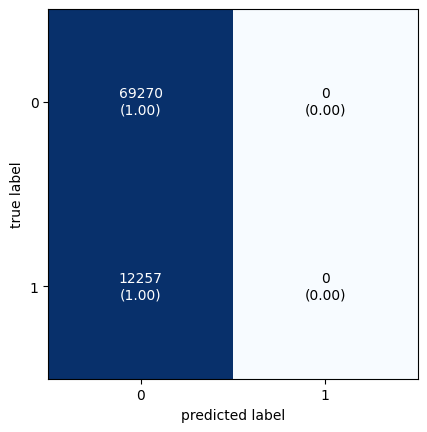

In [144]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(conf_mat=cm_log2,
                                show_absolute=True,
                                show_normed=True)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y2,y_pred_class2))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92     69270
         1.0       0.00      0.00      0.00     12257

    accuracy                           0.85     81527
   macro avg       0.42      0.50      0.46     81527
weighted avg       0.72      0.85      0.78     81527



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Linear regression

In [147]:
df_filtered.head()

,gemhhinc,gemeduc,nbmedial,age,bstart,region
0,2.0,5.0,4.0,44.0,0.0,4.0
1,3.0,4.0,1.0,40.0,0.0,4.0
2,2.0,4.0,4.0,64.0,1.0,4.0
3,3.0,4.0,1.0,42.0,0.0,4.0
4,2.0,4.0,3.0,37.0,1.0,4.0


In [148]:
# One-Hot Encoding for 'cat_bins'
df = pd.get_dummies(df_filtered, columns=['gemhhinc', 'gemeduc', 'nbmedial', 'bstart', 'region'], drop_first=True)

# Display the first few rows to verify
df.head()

,age,gemhhinc_2.0,gemhhinc_3.0,gemeduc_2.0,gemeduc_3.0,gemeduc_4.0,gemeduc_5.0,nbmedial_2.0,nbmedial_3.0,nbmedial_4.0,nbmedial_5.0,bstart_1.0,region_2.0,region_3.0,region_4.0
0,44.0,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,40.0,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,64.0,True,False,False,False,True,False,False,False,True,False,True,False,False,True
3,42.0,False,True,False,False,True,False,False,False,False,False,False,False,False,True
4,37.0,True,False,False,False,True,False,False,True,False,False,True,False,False,True


In [149]:
# Initialize the scaler
scaler = StandardScaler()

# List of features to scale
features_to_scale = ['age']

# Fit and transform the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Display the first few rows to verify
df.head()

,age,gemhhinc_2.0,gemhhinc_3.0,gemeduc_2.0,gemeduc_3.0,gemeduc_4.0,gemeduc_5.0,nbmedial_2.0,nbmedial_3.0,nbmedial_4.0,nbmedial_5.0,bstart_1.0,region_2.0,region_3.0,region_4.0
0,0.235930,True,False,False,False,False,True,False,False,True,False,False,False,False,True
1,-0.057749,False,True,False,False,True,False,False,False,False,False,False,False,False,True
2,1.704325,True,False,False,False,True,False,False,False,True,False,True,False,False,True
3,0.089090,False,True,False,False,True,False,False,False,False,False,False,False,False,True
4,-0.278008,True,False,False,False,True,False,False,True,False,False,True,False,False,True


In [150]:
# Define the target variable
y = df['age']

# Define feature columns (excluding target and 'Longitude' and 'Latitude' as these doesn't tell us anything except geo positions)
feature_cols = [
    'gemhhinc_2.0', 'gemhhinc_3.0', 'gemeduc_2.0', 'gemeduc_3.0',
    'gemeduc_4.0', 'gemeduc_5.0', 'nbmedial_2.0',
    'nbmedial_3.0', 'nbmedial_4.0',
    'nbmedial_5.0', 'bstart_1.0',
    'region_2.0', 'region_3.0',
    'region_4.0'
]

# Define the feature set
X = df[feature_cols]

In [151]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [152]:
# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)


LinearRegression()

In [153]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

In [154]:
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Linear Regression Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")

Linear Regression Mean Squared Error (MSE): 0.91
Linear Regression Mean Absolute Error (MAE): 0.80
Linear Regression R² Score: 0.08


<ipython-input-155-ea780b3fda44>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


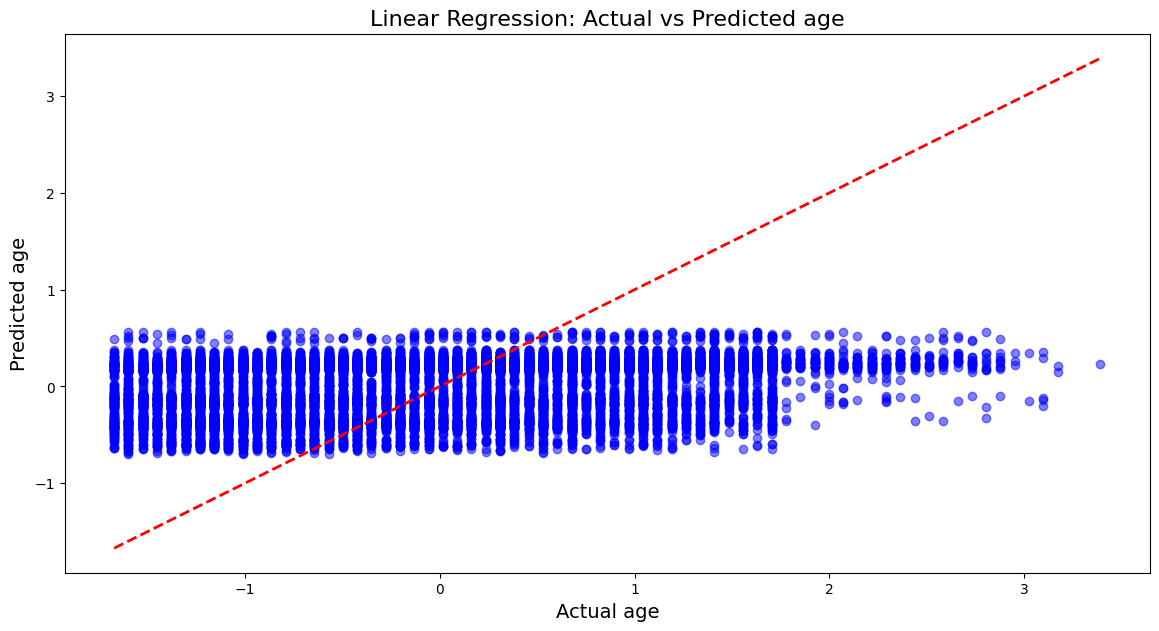

In [155]:
# Plot actual vs predicted values
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Linear Regression: Actual vs Predicted age', fontsize=16)
plt.xlabel('Actual age', fontsize=14)
plt.ylabel('Predicted age', fontsize=14)
plt.show()

## Random forrest

Random Forest Regression Mean Squared Error (MSE): 0.90
Random Forest Regression Mean Absolute Error (MAE): 0.79
Random Forest Regression R² Score: 0.09


<ipython-input-156-4a87130ba6c6>:64: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


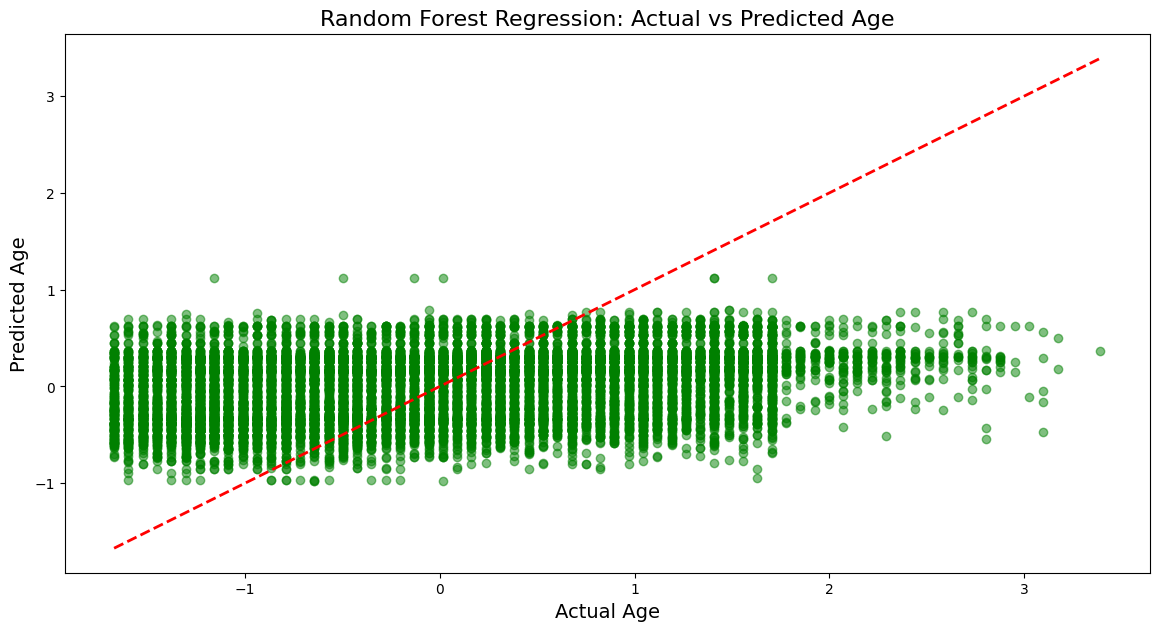

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# One-Hot Encoding for categorical features
df = pd.get_dummies(df_filtered, columns=['gemhhinc', 'gemeduc', 'nbmedial', 'bstart', 'region'], drop_first=True)

# Initialize the scaler
scaler = StandardScaler()

# List of features to scale
features_to_scale = ['age']

# Fit and transform the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Define the target variable
y = df['age']

# Define feature columns (excluding target and 'Longitude' and 'Latitude' as these don't tell us anything except geo positions)
feature_cols = [
    'gemhhinc_2.0', 'gemhhinc_3.0', 'gemeduc_2.0', 'gemeduc_3.0',
    'gemeduc_4.0', 'gemeduc_5.0', 'nbmedial_2.0',
    'nbmedial_3.0', 'nbmedial_4.0',
    'nbmedial_5.0', 'bstart_1.0',
    'region_2.0', 'region_3.0',
    'region_4.0'
]

# Define the feature set
X = df[feature_cols]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Random Forest Regression model
model_rf = RandomForestRegressor(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest Regression Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Random Forest Regression R² Score: {r2_rf:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Random Forest Regression: Actual vs Predicted Age', fontsize=16)
plt.xlabel('Actual Age', fontsize=14)
plt.ylabel('Predicted Age', fontsize=14)
plt.show()

#SHAP

In [159]:
df = df_filtered.copy()
df.head()

,gemhhinc,gemeduc,nbmedial,age,bstart,region
0,2.0,5.0,4.0,44.0,0.0,4.0
1,3.0,4.0,1.0,40.0,0.0,4.0
2,2.0,4.0,4.0,64.0,1.0,4.0
3,3.0,4.0,1.0,42.0,0.0,4.0
4,2.0,4.0,3.0,37.0,1.0,4.0


In [160]:
# Again some value mapping in order for it ti look pretty
value_mapping_gemhhinc = {1.0: 'Low', 2.0: 'Medium', 3.0: 'High'}
value_mapping_ggemeduc = {1.0: 'Low', 2.0: 'Semi-low', 3.0: 'Medium', 4.0: 'Semi-high', 5.0:'High'}  # Define your value mappings
value_mapping_nbmedial = {1.0: 'Low', 2.0: 'Semi-low', 3.0: 'Medium', 4.0: 'Semi-high', 5.0:'High'}
value_mapping_bstart = {0.0: 'No', 1.0: 'Yes'}
value_mapping_region = {1.0: 'Midde East & Africa', 2.0: 'Central & East Asia', 3.0: 'Latin America & Caribbean', 4.0: 'Europe & N America'}  # Define your value mappings
df['gemhhinc'] = df['gemhhinc'].replace(value_mapping_gemhhinc)
df['gemeduc'] = df['gemeduc'].replace(value_mapping_ggemeduc)
df['nbmedial'] = df['nbmedial'].replace(value_mapping_bstart)
df['bstart'] = df['bstart'].replace(value_mapping_gemhhinc)
df['region'] = df['region'].replace(value_mapping_region)

In [161]:
df.head()

,gemhhinc,gemeduc,nbmedial,age,bstart,region
0,Medium,High,4.0,44.0,0.0,Europe & N America
1,High,Semi-high,Yes,40.0,0.0,Europe & N America
2,Medium,Semi-high,4.0,64.0,Low,Europe & N America
3,High,Semi-high,Yes,42.0,0.0,Europe & N America
4,Medium,Semi-high,3.0,37.0,Low,Europe & N America


## Data Preprocessing

Let's clean the data and prepare it for analysis. We'll also perform some initial exploratory data analysis to understand our dataset better.

In [162]:
!pip install xgboost -q
!pip install shap -q
!pip install imbalanced-learn -q

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBRegressor
import shap
import joblib

In [163]:
df.info()
df_filtered['age_z'] = (df_filtered['age'] - df_filtered['age'].mean()) / df_filtered['age'].std(ddof=0)
df = df_filtered[df_filtered.age_z.abs() < 2]

print("Data shape after initial filtering:", data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 81550 entries, 0 to 141402
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gemhhinc  81550 non-null  object 
 1   gemeduc   81550 non-null  object 
 2   nbmedial  81550 non-null  object 
 3   age       81550 non-null  float64
 4   bstart    81550 non-null  object 
 5   region    81550 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.4+ MB
Data shape after initial filtering: (141403, 469)


### Handling Imbalanced Data

In [164]:
# Check initial distribution of room types
print("Initial -have you started a business- distribution:")
print(df['bstart'].value_counts())

# Initialize RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply resampling using 'room_type' as a balancing feature
X_resampled, _ = rus.fit_resample(df, df['bstart'])

print("\nRoom type distribution after balancing:")
print(X_resampled['bstart'].value_counts())

# Update our dataframe (or not - since this was just an example)
# df = X_resampled

Initial -have you started a business- distribution:
bstart
0.0    67955
1.0    12207
Name: count, dtype: int64

Room type distribution after balancing:
bstart
0.0    12207
1.0    12207
Name: count, dtype: int64


### Feature Engineering

We'll now encode categorical variables and scale numerical features.

In [165]:
# Separate features and target
X = df.drop('bstart', axis=1)
y = df['bstart']

# One-hot encode categorical variables
ohe = OneHotEncoder() # be careful - output is a sparse matrix
cat_features = ['gemhhinc', 'gemeduc', 'nbmedial', 'region']
X_cat = pd.DataFrame(ohe.fit_transform(X[cat_features]).todense(), columns=ohe.get_feature_names_out(cat_features))

# Scale numerical features
scaler = StandardScaler()
num_features = ['age']
X_num = pd.DataFrame(scaler.fit_transform(X[num_features]), columns=num_features)

# Combine encoded categorical and scaled numerical features
X_processed = pd.concat([X_num, X_cat], axis=1)

print("Shape of processed features:", X_processed.shape)

Shape of processed features: (80162, 18)


### Model Training and Evaluation

We'll use XGBoost for our regression task.

In [166]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.15, random_state=42)

# Train XGBoost model
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, model_xgb.predict(X_train)))
test_rmse = np.sqrt(mean_squared_error(y_test, model_xgb.predict(X_test)))

print(f"Train Root Mean Squared Error: {train_rmse:.2f}")
print(f"Test Root Mean Squared Error: {test_rmse:.2f}")

Train Root Mean Squared Error: 0.33
Test Root Mean Squared Error: 0.34


### Model Explainability

Understanding how our model makes predictions is crucial. We'll use SHAP (SHapley Additive exPlanations) values to interpret our model.

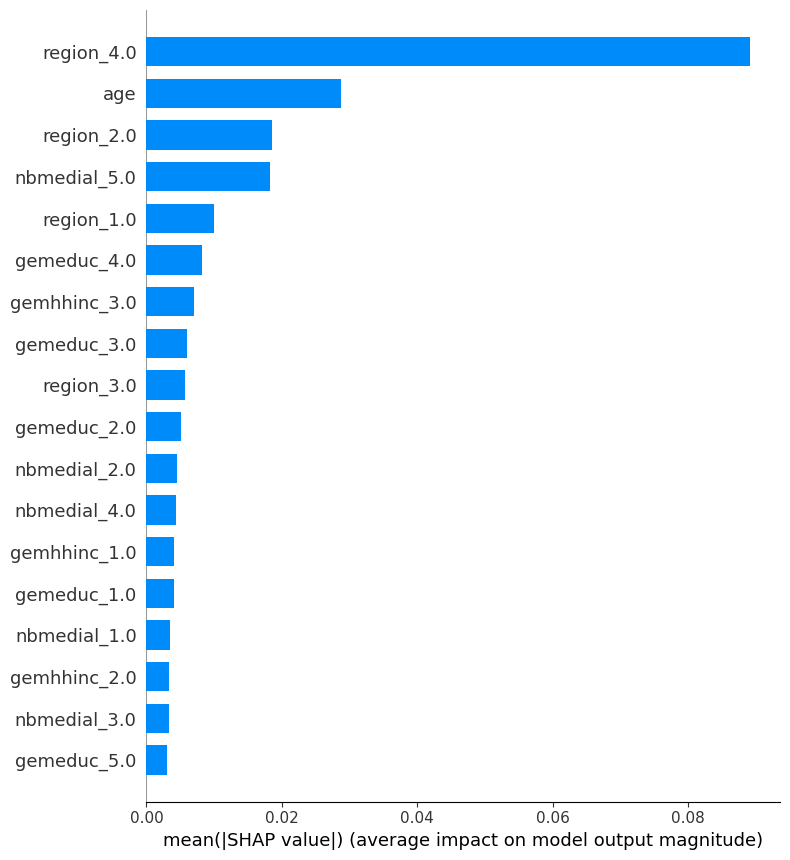

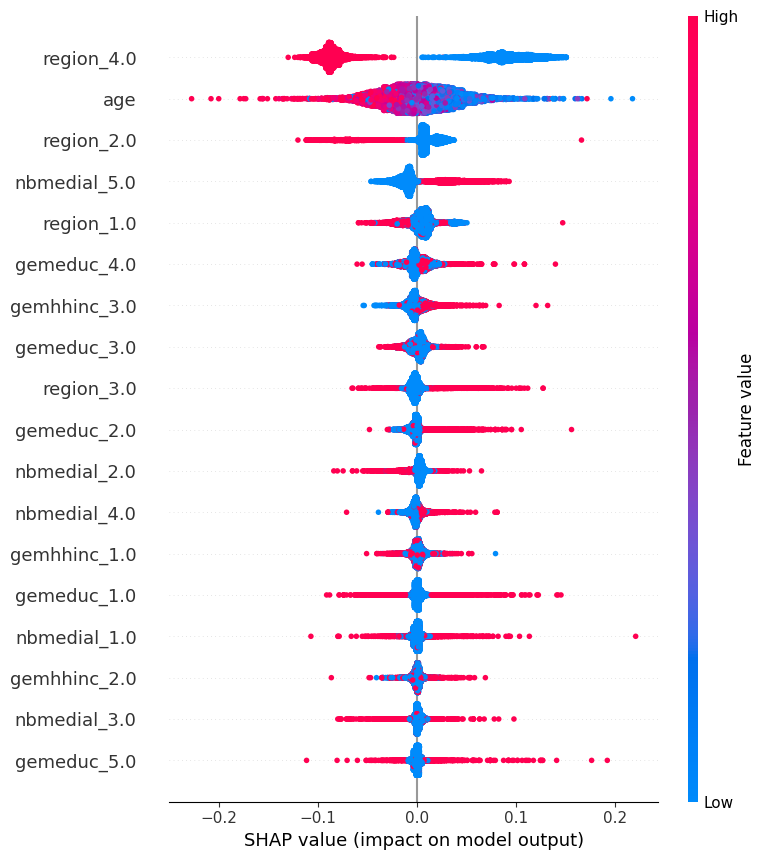

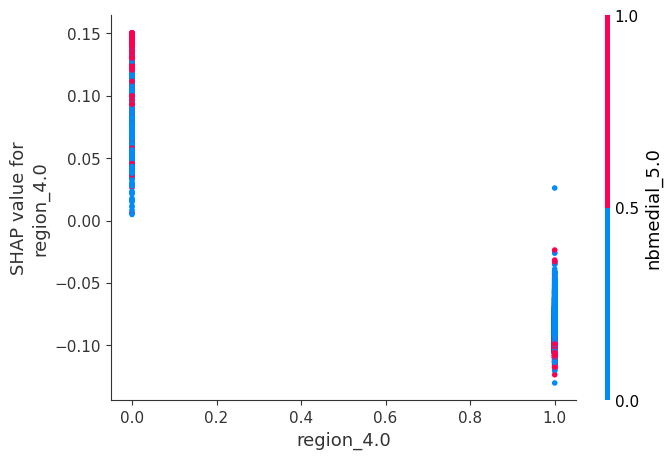

In [167]:
# Create a SHAP explainer
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test)

# Plot feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Plot SHAP values
shap.summary_plot(shap_values, X_test)

# Plot dependence for the most important feature
most_important_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(0))]
shap.dependence_plot(most_important_feature, shap_values, X_test)

In [168]:
joblib.dump(model_xgb, 'model_xgb.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(ohe, 'ohe.joblib')

['ohe.joblib']